In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
nyc=pd.read_csv('/content/311_Service_Requests_from_2010_to_Present[1].csv')

In [3]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
nyc.shape

(1667, 53)

In [5]:
nyc.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

In [6]:
nyc.describe

<bound method NDFrame.describe of       Unique Key            Created Date             Closed Date Agency  \
0       32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1       32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2       32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3       32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4       32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...          ...                     ...                     ...    ...   
1662    32301730  12/30/2015 04:02:30 AM  12/31/2015 05:05:54 PM   NYPD   
1663    32302253  12/30/2015 03:51:43 AM  12/30/2015 06:35:05 AM   NYPD   
1664    32302444  12/30/2015 03:49:33 AM  12/30/2015 04:44:27 AM   NYPD   
1665    32299528  12/30/2015 03:34:52 AM  12/30/2015 05:09:53 AM   NYPD   
1666    32299842  12/30/2015 03:34:39 AM  12/31/2015 11:13:47 AM   NYPD   

                          Agency Name           Complaint Type  \

In [38]:
nyc.isna().sum(axis=0)

Unique Key                           0
Created Date                         0
Closed Date                          3
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                          35
Location Type                        0
Incident Zip                         7
Incident Address                   196
Street Name                        196
Cross Street 1                     214
Cross Street 2                     216
Intersection Street 1             1471
Intersection Street 2             1473
Address Type                         7
City                                 7
Landmark                          1667
Facility Type                        3
Status                               0
Due Date                             0
Resolution Description               0
Resolution Action Updated Date       3
Community Board                      0
Borough                              0
X Coordinate (State Plane

In [8]:
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'])
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'])

In [9]:
nyc.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

In [10]:
#Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and
#create a new column ‘Request_Closing_Time’ 
nyc['Request_Closing_Time'] = nyc['Closed Date']-nyc['Created Date']
nyc['Request_Closing_Time_hour']=nyc['Request_Closing_Time']/np.timedelta64(1,'h')

In [11]:
nyc['Request_Closing_Time_hour'].head()

0    0.920833
1    1.437778
2    4.858611
3    7.753889
4    3.450556
Name: Request_Closing_Time_hour, dtype: float64

In [12]:
nyc.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot 

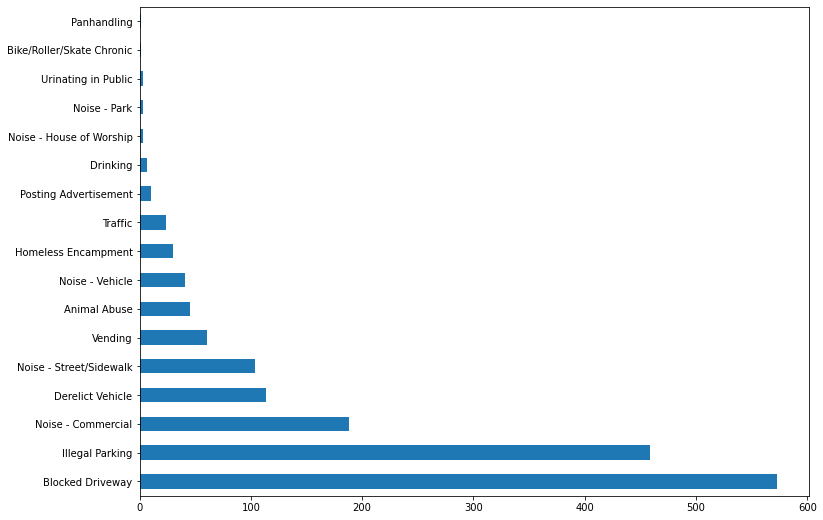

In [13]:
nyc['Complaint Type'].value_counts().plot(kind='barh', figsize=(12,9))
plt.show()

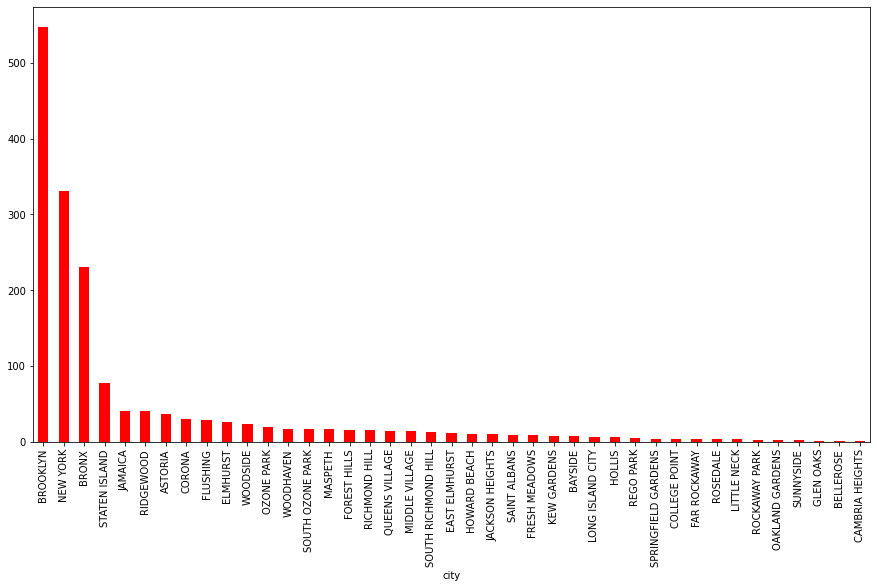

In [14]:
nyc['City'].value_counts().plot(kind='bar',color='red', figsize=(15,8))
plt.xlabel('city')
plt.show()

In [15]:
nyc['City'].value_counts()

BROOKLYN               547
NEW YORK               331
BRONX                  231
STATEN ISLAND           77
JAMAICA                 41
RIDGEWOOD               41
ASTORIA                 36
CORONA                  30
FLUSHING                29
ELMHURST                26
WOODSIDE                23
OZONE PARK              19
WOODHAVEN               17
SOUTH OZONE PARK        17
MASPETH                 16
FOREST HILLS            15
RICHMOND HILL           15
QUEENS VILLAGE          14
MIDDLE VILLAGE          14
SOUTH RICHMOND HILL     13
EAST ELMHURST           11
HOWARD BEACH            10
JACKSON HEIGHTS         10
SAINT ALBANS             9
FRESH MEADOWS            9
KEW GARDENS              7
BAYSIDE                  7
LONG ISLAND CITY         6
HOLLIS                   6
REGO PARK                5
SPRINGFIELD GARDENS      4
COLLEGE POINT            4
FAR ROCKAWAY             4
ROSEDALE                 4
LITTLE NECK              3
ROCKAWAY PARK            2
OAKLAND GARDENS          2
S

In [16]:
# Conclusion: Average Request Closing Time for various Complaints
df3 = nyc[['Complaint Type','Request_Closing_Time_hour']]
df4 = df3.groupby('Complaint Type')['Request_Closing_Time_hour'].mean().fillna(0).to_frame()
df4

,Request_Closing_Time_hour
Complaint Type,
Animal Abuse,3.241747
Bike/Roller/Skate Chronic,3.509444
Blocked Driveway,4.894083
Derelict Vehicle,5.180136
Drinking,2.042579
Homeless Encampment,3.917074
Illegal Parking,4.201658
Noise - Commercial,2.608022
Noise - House of Worship,1.121111


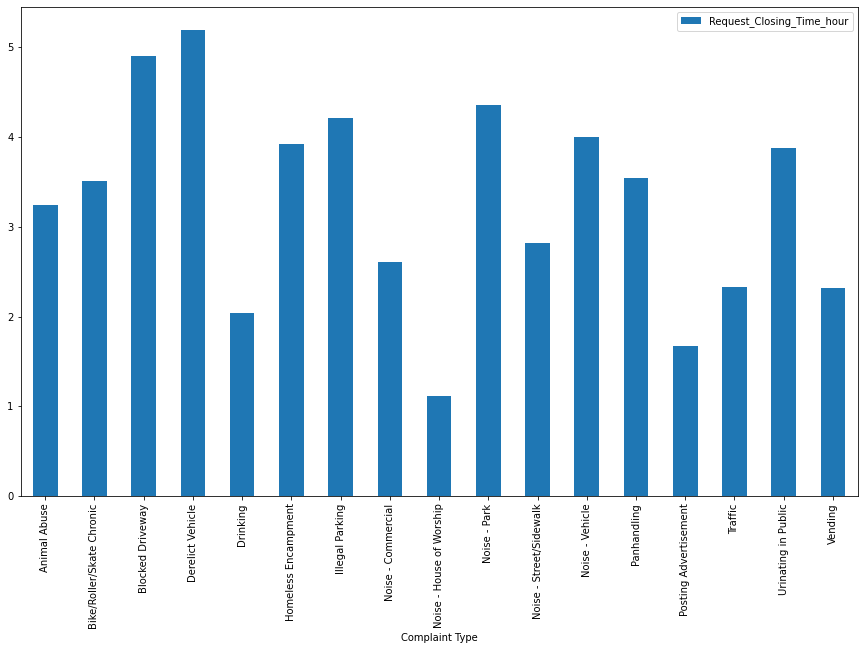

In [17]:
df4.plot(kind='bar', figsize=(15,9))
plt.xlabel('Complaint Type')
plt.show()

In [18]:
import seaborn as sns

Text(0.5, 1.0, 'Average Request Closing Time for Boroughs')

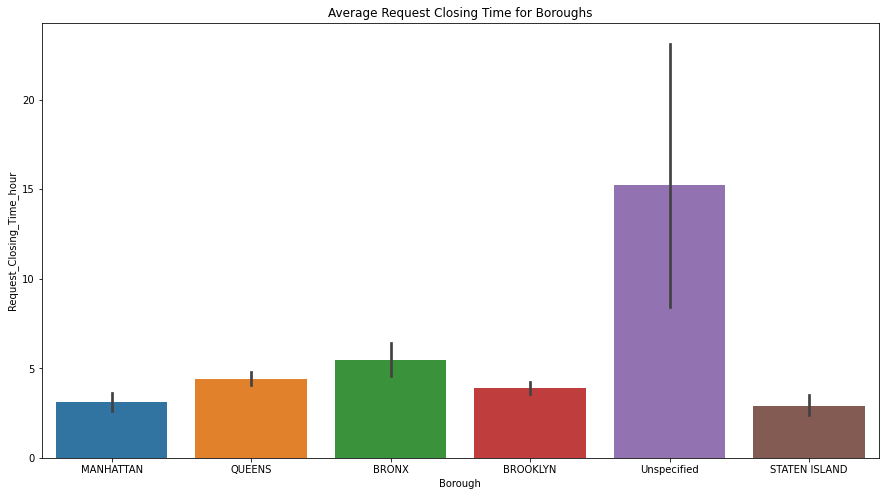

In [19]:
#Average resolving time of a compalaint was observed for different Boroughs
plt.figure(figsize=(15,8))
sns.barplot(x='Borough',y='Request_Closing_Time_hour', data=nyc)
plt.title('Average Request Closing Time for Boroughs')

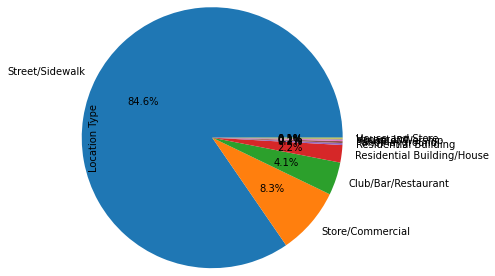

<Figure size 720x1080 with 0 Axes>

In [20]:
nyc['Location Type'].value_counts().plot(kind='pie',autopct='%1.1f%%', radius=1.5)
plt.figure(figsize=(10,15))
plt.show()

In [21]:
#Average resolving time of a compalaint was observed for different Boroughs

In [22]:
nyc_mod=nyc.drop(['Park Facility Name', 'Park Borough', 'School Name',
       'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint'], axis=1)

In [23]:
nyc_mod.columns.values

array(['Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name',
       'Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Address Type', 'City', 'Landmark',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'Request_Closing_Time_hour'], dtype=object)

In [24]:
nyc_mod.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.450556
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:30,1.891667
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",0 days 01:57:28,1.957778
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)",0 days 01:47:55,1.798611
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)",0 days 08:33:02,8.550556
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:02,1.383889


In [25]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
df5=nyc.groupby(['Complaint Type','Location Type'])['Request_Closing_Time_hour'].mean()
df5.unstack().fillna(0)

Location Type,Club/Bar/Restaurant,House and Store,House of Worship,Park/Playground,Residential Building,Residential Building/House,Store/Commercial,Street/Sidewalk,Vacant Lot
Complaint Type,,,,,,,,,
Animal Abuse,0.000000,1.633889,0.000000,0.000000,3.508958,3.412000,2.511944,2.962882,0.000000
Bike/Roller/Skate Chronic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.509444,0.000000
Blocked Driveway,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.894083,0.000000
Derelict Vehicle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.170494,5.720139
Drinking,1.706333,0.000000,0.000000,0.000000,0.000000,4.989444,0.776944,0.000000,0.000000
Homeless Encampment,0.000000,0.000000,0.000000,3.516667,0.000000,6.017431,4.522847,3.420688,0.000000
Illegal Parking,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.201658,0.000000
Noise - Commercial,2.063981,0.000000,0.000000,0.000000,0.000000,0.000000,2.882218,0.000000,0.000000
Noise - House of Worship,0.000000,0.000000,1.121111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
nyc['Complaint Type'].value_counts()

Blocked Driveway             573
Illegal Parking              459
Noise - Commercial           188
Derelict Vehicle             114
Noise - Street/Sidewalk      104
Vending                       61
Animal Abuse                  45
Noise - Vehicle               41
Homeless Encampment           30
Traffic                       24
Posting Advertisement         10
Drinking                       7
Noise - House of Worship       3
Noise - Park                   3
Urinating in Public            3
Bike/Roller/Skate Chronic      1
Panhandling                    1
Name: Complaint Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


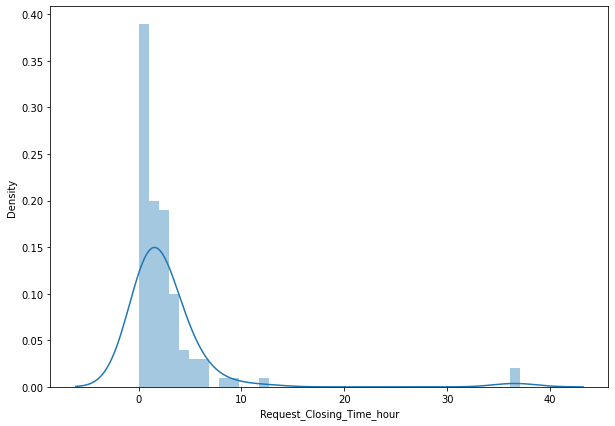

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(nyc[nyc['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Time_hour'])
plt.show()

In [ ]:
#The above data is right skewed, needs to be converted to gaussian

In [28]:
from scipy.stats import skew

In [29]:
# Applying log transformation
nyc_skew={}
for i in nyc['Complaint Type'].unique():
 nyc_skew[i] = np.log(nyc[nyc['Complaint Type']==i]['Request_Closing_Time_hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


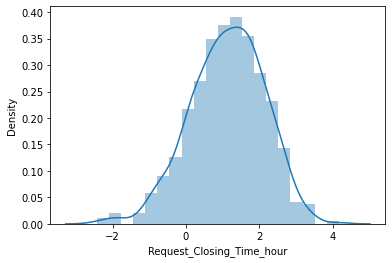

In [30]:
plt.figure()
sns.distplot(nyc_skew['Blocked Driveway'])
plt.show()

In [31]:
from scipy.stats import f_oneway

In [32]:
# ANOVA Analysis (Checking for top 5 complaints)
#1. Null Hypothesis: The average response time across complaint types is not different
# Alternate Hypothesis: The average response time across complaint types is different

stat, pvalue=f_oneway(nyc_skew['Blocked Driveway'], nyc_skew['Illegal Parking'],nyc_skew['Noise - Commercial'],
                    nyc_skew['Derelict Vehicle'], nyc_skew['Noise - Street/Sidewalk'] )
if pvalue>0.05:
  print("Null hypothesis is accepted")
else:
  print("Null hypothesis is rejected")


Null hypothesis is rejected


In [33]:
df8 = nyc[['Complaint Type','Location','City','Borough']]
df8

,Complaint Type,Location,City,Borough
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",NEW YORK,MANHATTAN
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",ASTORIA,QUEENS
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)",BRONX,BRONX
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)",BRONX,BRONX
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)",ELMHURST,QUEENS
...,...,...,...,...
1662,Noise - Street/Sidewalk,"(40.86024195513732, -73.92842019162248)",NEW YORK,MANHATTAN
1663,Noise - Commercial,"(40.70810404540373, -73.94306883695855)",BROOKLYN,BROOKLYN
1664,Noise - Street/Sidewalk,"(40.82465431514079, -73.93835866654024)",NEW YORK,MANHATTAN
1665,Noise - Commercial,"(40.73003889097716, -73.98064627090524)",NEW YORK,MANHATTAN


In [34]:
df8['Complaint Type']=df8['Complaint Type'].astype('category').cat.codes
df8['City']= df8['City'].astype('category').cat.codes
df8['Borough']= df8['Borough'].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [35]:
df8.head(6)

,Complaint Type,Location,City,Borough
0,10,"(40.86568153633767, -73.92350095571744)",24,2
1,2,"(40.775945312321085, -73.91509393898605)",0,3
2,2,"(40.870324522111424, -73.88852464418646)",3,0
3,6,"(40.83599404683083, -73.82837939584206)",3,0
4,6,"(40.733059618956815, -73.87416975810375)",9,3
5,6,"(40.66082272389114, -73.99256786342693)",4,1


In [36]:
df8.corr()

,Complaint Type,City,Borough
Complaint Type,1.000000,0.158603,0.010847
City,0.158603,1.000000,0.712949
Borough,0.010847,0.712949,1.000000


In [ ]:
#From the first line it can be seen that the complaint types does not depend upon the location.